<a href="https://colab.research.google.com/github/ZaimaSartajTaheri/ResearchCodes/blob/main/tamim_cnn_model_final_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [47]:
test_dir="/content/drive/MyDrive/CovidDataset/Test"
train_dir="/content/drive/MyDrive/CovidDataset/Train"
val_dir="/content/drive/MyDrive/CovidDataset/Val"

In [48]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import optimizers
from keras.callbacks import History 
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    # rotation_range=20,
     #width_shift_range=0.1,
    # shear_range=0.1,
     zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

In [49]:
train = image_generator.flow_from_directory(train_dir, 
                                            batch_size=32, 
                                            shuffle=True, 
                                            class_mode='categorical',
                                            target_size=(224, 224))

validation =image_generator.flow_from_directory(val_dir, 
                                                batch_size=1, 
                                                shuffle=False, 
                                                class_mode='categorical',
                                                target_size=(224, 224))

test =image_generator.flow_from_directory(test_dir, 
                                            batch_size=1, 
                                            shuffle=False, 
                                            class_mode='categorical',
                                            target_size=(224, 224))

Found 8376 images belonging to 3 classes.
Found 2792 images belonging to 3 classes.
Found 2790 images belonging to 3 classes.


In [50]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization


model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
# model.add(Dense(64,activation='relu'))

model.add(Dense(3,activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 54, 54, 64)       

In [52]:

r = model.fit(
    train, 
    epochs=20,
    validation_data=validation,
    validation_steps=100,
)

Epoch 1/20
262/262 [==============================] - 144s 545ms/step - loss: 0.7897 - accuracy: 0.6703 - val_loss: 0.3673 - val_accuracy: 0.8800
Epoch 2/20
262/262 [==============================] - 138s 527ms/step - loss: 0.3679 - accuracy: 0.8428 - val_loss: 0.3905 - val_accuracy: 0.8800
Epoch 3/20
262/262 [==============================] - 140s 533ms/step - loss: 0.2881 - accuracy: 0.8810 - val_loss: 0.3110 - val_accuracy: 0.8900
Epoch 4/20
262/262 [==============================] - 138s 526ms/step - loss: 0.2521 - accuracy: 0.8985 - val_loss: 0.2430 - val_accuracy: 0.9200
Epoch 5/20
262/262 [==============================] - 138s 527ms/step - loss: 0.2123 - accuracy: 0.9179 - val_loss: 0.3157 - val_accuracy: 0.9000
Epoch 6/20
262/262 [==============================] - 140s 535ms/step - loss: 0.1704 - accuracy: 0.9346 - val_loss: 0.2233 - val_accuracy: 0.9300
Epoch 7/20
262/262 [==============================] - 139s 531ms/step - loss: 0.1804 - accuracy: 0.9287 - val_loss: 0.3988 -

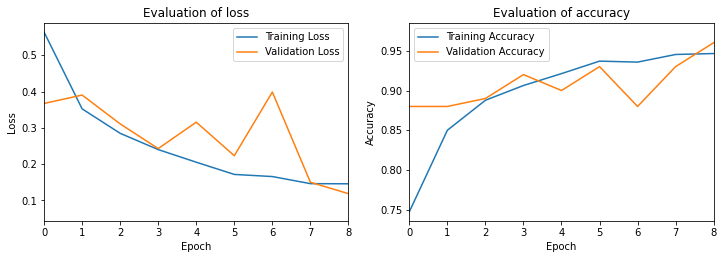

In [58]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Training Loss',scalex=True)
plt.plot(r.history['val_loss'], label='Validation Loss',scalex=True)
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.xlim(0,8)
plt.legend()
plt.title('Evaluation of loss')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Training Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.xlim(0,8)
plt.legend()
plt.title('Evaluation of accuracy')
plt.savefig("cnn_curve2.png")

In [59]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

2790/2790 [==============================] - 49s 17ms/step - loss: 0.1994 - accuracy: 0.9362
Test Accuracy: 93.62%
262/262 [==============================] - 133s 509ms/step - loss: 0.0427 - accuracy: 0.9871
Train Accuracy: 98.71%


In [60]:
from keras.utils.np_utils import to_categorical 
num_classes=len(test.class_indices)

test_labels = test.classes  
test_labels = to_categorical(test_labels, num_classes=num_classes) 
test_labels

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [61]:
from sklearn.metrics import confusion_matrix, classification_report

# rounded_labels=np.argmax(test, axis=1)

pred = model.predict(test)
# pred = np.argmax(predictions, axis=1)

y_pred=np.argmax(pred, axis=1)
y_test=np.argmax(test_labels, axis=1)


cnf_matrix=confusion_matrix(y_test, y_pred)
pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))

,0,1,2,accuracy,macro avg,weighted avg
precision,0.931250,0.916579,0.990940,0.945161,0.946256,0.946256
recall,0.961290,0.933333,0.940860,0.945161,0.945161,0.945161
f1-score,0.946032,0.924880,0.965251,0.945161,0.945388,0.945388
support,930.000000,930.000000,930.000000,0.945161,2790.000000,2790.000000


In [62]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[894  35   1]
 [ 55 868   7]
 [ 11  44 875]]


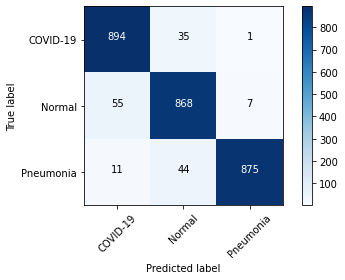

In [63]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['COVID-19', 'Normal', 'Pneumonia'])
plt.savefig("CNN_CONFUTIONMATRIX2.png")

In [36]:
model.save('tamim_cnn_model_final_1.h5')